# Assignmnet 1
## Model Selection (Part 1)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
matr = []
Y = []

In [101]:
# Read the data 
data = pd.read_csv("Datasets/Dataset_1_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
data.columns = cols
data.head()


,x,y
0,0.516220,1.609671
1,0.850085,14.814006
2,-0.840629,-8.738649
3,0.227433,-0.274344
4,-0.649508,-8.683412


In [102]:
x = data['x']
y = data['y']

In [103]:
plt.scatter(x,y)

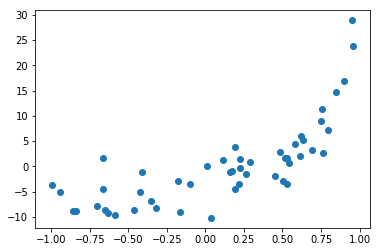

In [104]:
plt.show()

In [105]:
matr = []
for a in x:
    row =[]
    for p in range(20,-1,-1): 
        row = row + [a**(p)]
    matr = matr + [row]  

In [106]:
#Initialization for X, X^T and Y.
Y=[]
for i in y:
    Y = Y +[[i]]
    
X = np.array(matr) 
XT = X.transpose() 

### $$ W^* = (X^TX)^{-1}X^TY$$

### Using the formula we derived from class, we get the following parameters for the polynomial

In [107]:
# Get the parameters
A = np.dot(XT,X)
A1 = np.matrix(A)
A_I = A1.I
XTX = np.dot(A_I,XT)
W = np.dot(XTX,Y)
# Get the Transpose because its easier to use as a row vector
WT = W.transpose()
# flatten the list.
p = WT.tolist()[0]
# Define the polynomial
Poly = np.poly1d(p)


### Get the new Y values
Plot the curve and compare it with training data.

In [108]:
x1 = x.tolist()
x1.sort()
new_y = [Poly(i) for i in x ]
plt_y = [Poly(i) for i in x1 ]

## Calculate The training MSE

In [109]:
sigma = 0
for i in range(len(new_y)):
    sigma = sigma + (new_y[i] - y[i])**2 
print("The Training mean square error is:",sigma/len(y))

The Training mean square error is: 6.474747793


### Read the Validation data 

In [110]:
valid = pd.read_csv("Datasets/Dataset_1_valid.csv",header=-1,usecols=range(2))
cols = ["x","y"]
valid.columns = cols
#data.head()
u = valid['x']
v = valid['y']

## calculate the validation MSE

In [111]:
new_v = [Poly(i) for i in u ]
sigma = 0
for i in range(len(new_v)):
    sigma = sigma + (new_v[i] - v[i])**2 
print("The validation mean square error is:",sigma/len(v))


The validation mean square error is: 1418.46219822


#### Curve Fit with Training data 

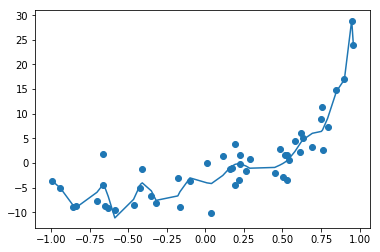

In [112]:
plt.scatter(x,y)
plt.plot(x1,plt_y)

plt.show()

 # TEST CURVE FIT

In [113]:
test = pd.read_csv("Datasets/Dataset_1_train.csv", header = -1,usecols=range(2))
cols = ["x","y"]
test.columns = cols
test.head() 

,x,y
0,0.516220,1.609671
1,0.850085,14.814006
2,-0.840629,-8.738649
3,0.227433,-0.274344
4,-0.649508,-8.683412


In [114]:
X = test['x'].tolist()
X.sort()
Y = [Poly(i) for i in X ]

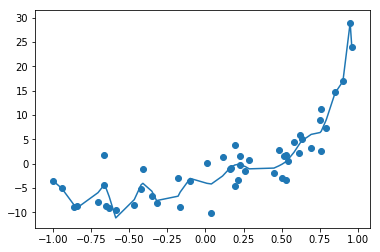

In [115]:
plt.plot(X,Y)
plt.scatter(test['x'],test['y'])
plt.show()